In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data/ipl.csv")

In [3]:
data.head(10)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
5,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.5,2,0,0,0,222
6,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,3,0,0.6,3,0,0,0,222
7,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,3,0,1.1,3,0,0,0,222
8,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,7,0,1.2,7,0,4,0,222
9,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,11,0,1.3,11,0,8,0,222


In [5]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [6]:
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

# Data Cleaning

* Removing unwanted Columns
* Keeping consistent teams only
* Removing the first 5 overs data in every match
* converting the date object from string to datetime object

In [9]:
#columns to be removed
columns_to_remove=['mid','batsman','bowler','striker','non-striker','venue']

print('Before removing unwanted columns: {}'.format(data.shape))
data.drop(labels=columns_to_remove,axis=1,inplace=True)
print('After removing unwanted columns: {}'.format(data.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 9)


In [10]:
data.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [11]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [12]:
data.index

RangeIndex(start=0, stop=76014, step=1)

In [13]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [16]:
#keeping only consistent teams
consistent_teams=['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad','Mumbai Indians']
print("Before Removing inconsistent teams: {}".format(data.shape))
data=data[(data['bat_team'].isin(consistent_teams))& (data['bowl_team'].isin(consistent_teams))]
print('After removing consistent teams: {}'.format(data.shape))

Before Removing inconsistent teams: (76014, 9)
After removing consistent teams: (53811, 9)


In [17]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [18]:
#removing first five overs from each match
print("Before Removing first 5 overs: {}".format(data.shape))
data=data[data['overs']>=5.0]
print("After removing first 5 overs: {}".format(data.shape))

Before Removing first 5 overs: (53811, 9)
After removing first 5 overs: (40108, 9)


In [20]:
#converting the column 'date' from string to datetime object
from datetime import datetime
print("Before converting: {}".format(type(data.iloc[0,0])))
data['date']=data['date'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d"))
print("After Removing: {}".format(type(data.iloc[0,0])))

Before converting: <class 'str'>
After Removing: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


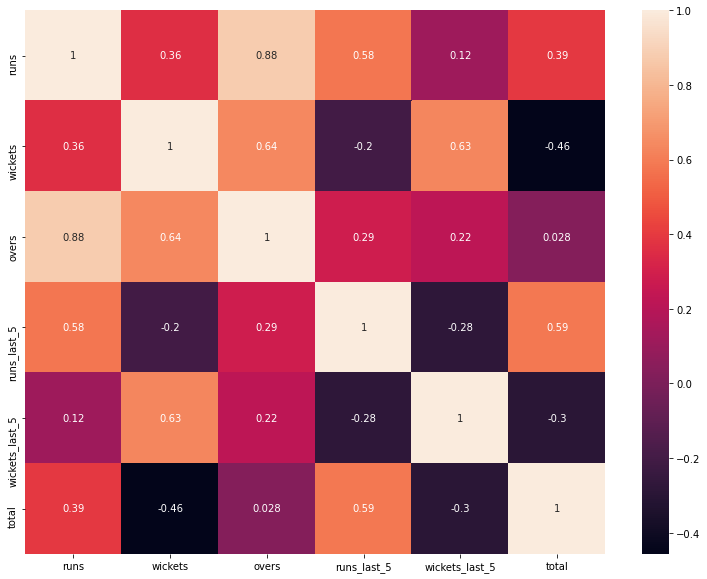

In [25]:
#selecting correlated feautures using heatmap

corr_matrix=data.corr()
top_corr_features=corr_matrix.index

#plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=data[top_corr_features].corr(),annot=True) #cmap="RdYlGn"

# Data Preprocessing

* Handling categorical features
* Splitting dataset into train and test set on the basis of date

In [27]:
#converting the categorical features using onehotencoding method
encoded_data=pd.get_dummies(data=data,columns=['bat_team','bowl_team'])
encoded_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [28]:
encoded_data.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# Rearranging the columns
encoded_data = encoded_data[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [31]:
#splitting the data into train and test set
X_train=encoded_data.drop(labels='total',axis=1)[encoded_data['date'].dt.year<=2016]
X_test=encoded_data.drop(labels='total',axis=1)[encoded_data['date'].dt.year<=2016]

y_train=encoded_data[encoded_data['date'].dt.year<=2016]['total'].values
y_test=encoded_data[encoded_data['date'].dt.year<=2016]['total'].values

#removing the date columns
X_train.drop(labels='date',axis=True,inplace=True)
X_test.drop(labels='date',axis=True,inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape,X_test.shape))

Training set: (37330, 21) and Test set: (37330, 21)


# Model Building

**1. Linear Regression**

In [32]:
from sklearn.linear_model import LinearRegression
linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
#predicting the results
y_pred_lr=linear_regressor.predict(X_test)

In [34]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,accuracy_score
print("-----------Linear Regression - Model Evaluation-----------")
print("Mean Absolute Error (MAE): {}".format(mae(y_test,y_pred_lr)))
print("Mean Sqaured Error (MSE): {}".format(mse(y_test,y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test,y_pred_lr))))

-----------Linear Regression - Model Evaluation-----------
Mean Absolute Error (MAE): 13.1160226845557
Mean Sqaured Error (MSE): 307.3221702822733
Root Mean Squared Error (RMSE): 17.530606671826085


**2. Decision Tree**

In [35]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor=DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
y_pred_dt=decision_regressor.predict(X_test)

In [41]:
print("-----------Decision Tree - Model Evaluation-----------")
print("Mean Absolute Error (MAE): {}".format(mae(y_test,y_pred_dt)))
print("Mean Sqaured Error (MSE): {}".format(mse(y_test,y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test,y_pred_dt))))

-----------Decision Tree - Model Evaluation-----------
Mean Absolute Error (MAE): 0.008384677203321726
Mean Sqaured Error (MSE): 0.12586391642110903
Root Mean Squared Error (RMSE): 0.3547730491752566


**3. Random Forest**

In [42]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
# Predicting results
y_pred_rf = random_regressor.predict(X_test)

In [44]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 1.4119348899136404
Mean Squared Error (MSE): 6.757292127484668
Root Mean Squared Error (RMSE): 2.599479203126016


Note: Since Linear Regression model performs best as compared to other two, we use this model and boost it's performance using AdaBoost Algorithm

**4. AdaBoost Algorithm**

In [48]:
from sklearn.ensemble import AdaBoostRegressor
ada_regressor=AdaBoostRegressor(base_estimator=linear_regressor,n_estimators=100)
ada_regressor.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=100)

In [49]:
y_pred_ada=ada_regressor.predict(X_test)

In [50]:
print("---- AdaBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_ada)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_ada)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_ada))))

---- AdaBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 13.382805240525666
Mean Squared Error (MSE): 310.81242954576345
Root Mean Squared Error (RMSE): 17.629873214114827


# Make Predictions

* Model trained on the data from IPL Seasons 1 to 9 ie: (2008 to 2016)
* Model tested on data from IPL Season 10 ie: (2017)
* Model predicts on data from IPL Seasons 11 to 12 ie: (2018 to 2019)

In [52]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    temp_array=list()
    
    #batting team
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]
        
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

    
    #Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

    #Converting into numpy array
    temp_array = np.array([temp_array])
    
    #Prediction
    return int(linear_regressor.predict(temp_array)[0])

# Prediction 1

* Date: 16th April 2018
* IPL : SEason 11
* Match No : 13
* Teams : KKR Vs DD
* First Innings Final Score : 200/9

In [54]:
final_score = predict_score(batting_team='Kolkata Knight Riders',bowling_team='Delhi Daredevils',overs=9.2,runs=72,wickets=2,runs_in_prev_5=60,wickets_in_prev_5=1)
print("The final predicted Score (rnage): {} to {}".format(final_score-10, final_score+5))

The final predicted Score (rnage): 152 to 167


# Prediction 2

* Date: 7th May 2018
* IPL : Season 11
* Match No : 39
* Teams : SRH Vs RCB
* First Innings Final Score : 146/10

In [55]:
final_score = predict_score(batting_team='Sunrisers Hyderabad',bowling_team='Royal Challengers Bangalore',overs=10.2,runs=67,wickets=3,runs_in_prev_5=29,wickets_in_prev_5=1)
print("The final predicted Score (rnage): {} to {}".format(final_score-10, final_score+5))

The final predicted Score (rnage): 140 to 155


# Prediction 3

* Date: 17th May 2018
* IPL : Season 11
* Match No : 50
* Teams : MI Vs KXIP
* First Innings Final Score : 186/8

In [56]:
final_score = predict_score(batting_team='Mumbai Indians',bowling_team='Kings XI Punjab',overs=14.4,runs=136,wickets=4,runs_in_prev_5=50,wickets_in_prev_5=0)
print("The final predicted Score (rnage): {} to {}".format(final_score-10, final_score+5))

The final predicted Score (rnage): 179 to 194


# Prediction 4
* Date: 11th April 2019
* IPL : Season 12
* Match number: 25
* Teams: RR Vs CSK
* First Innings final score: 151/7

In [57]:
final_score = predict_score(batting_team='Rajasthan Royals',bowling_team='Chennai Super Kings',overs=13.3,runs=92,wickets=5,runs_in_prev_5=27,wickets_in_prev_5=2)
print("The final predicted Score (rnage): {} to {}".format(final_score-10, final_score+5))

The final predicted Score (rnage): 128 to 143


# Prediction 5
* Date: 14th April 2019
* IPL : Season 12
* Match number: 30
* Teams: SRH Vs DD
* First Innings final score: 155/7

In [58]:
final_score = predict_score(batting_team='Sunrisers Hyderabad',bowling_team='Delhi Daredevils',overs=11.5,runs=98,wickets=3,runs_in_prev_5=41,wickets_in_prev_5=1)
print("The final predicted Score (rnage): {} to {}".format(final_score-10, final_score+5))

The final predicted Score (rnage): 161 to 176
